In [1]:
import re
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
%matplotlib inline

from numpy.random import seed
seed(1)

import tensorflow
tensorflow.random.set_seed(1)

import requests
import io

def get_data(url):
    s=requests.get(url).content
    return pd.read_csv(io.StringIO(s.decode('utf-8')))

In [2]:
df = get_data("https://api.covid19india.org/csv/latest/state_wise_daily.csv")

In [3]:
df.tail()

,Date,Date_YMD,Status,TT,AN,AP,AR,AS,BR,CH,...,PB,RJ,SK,TN,TG,TR,UP,UT,WB,UN
1375,15-Jun-21,2021-06-15,Recovered,107767,15,10567,326,2906,813,58,...,1691,1006,272,23207,2070,743,1104,515,2068,0
1376,15-Jun-21,2021-06-15,Deceased,2540,0,53,4,34,9,3,...,48,14,3,267,14,4,56,25,75,0
1377,16-Jun-21,2021-06-16,Confirmed,67289,26,6617,250,3386,370,41,...,675,280,147,10448,1489,536,251,353,3187,0
1378,16-Jun-21,2021-06-16,Recovered,103900,30,10228,289,4881,730,63,...,1383,928,420,21058,1436,596,927,398,2012,0
1379,16-Jun-21,2021-06-16,Deceased,2329,1,57,0,36,9,2,...,48,9,1,270,11,5,49,12,69,0


In [4]:
df = df[df['Status']=='Confirmed']
df.head(-1)

,Date,Date_YMD,Status,TT,AN,AP,AR,AS,BR,CH,...,PB,RJ,SK,TN,TG,TR,UP,UT,WB,UN
0,14-Mar-20,2020-03-14,Confirmed,81,0,1,0,0,0,0,...,1,3,0,1,1,0,12,0,0,0
3,15-Mar-20,2020-03-15,Confirmed,27,0,0,0,0,0,0,...,0,1,0,0,2,0,1,0,0,0
6,16-Mar-20,2020-03-16,Confirmed,15,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
9,17-Mar-20,2020-03-17,Confirmed,11,0,0,0,0,0,0,...,0,0,0,0,1,0,2,0,1,0
12,18-Mar-20,2020-03-18,Confirmed,37,0,0,0,0,0,0,...,1,3,0,1,8,0,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1362,11-Jun-21,2021-06-11,Confirmed,84574,36,8239,358,3666,566,70,...,1201,446,147,15759,1707,641,596,287,4883,0
1365,12-Jun-21,2021-06-12,Confirmed,80525,10,6952,298,3463,432,58,...,961,368,167,15108,1771,428,504,463,4286,0
1368,13-Jun-21,2021-06-13,Confirmed,71001,18,6770,134,2167,487,54,...,956,308,157,14016,1280,565,452,263,3984,0
1371,14-Jun-21,2021-06-14,Confirmed,60008,8,4549,366,3678,324,50,...,622,277,36,12772,1511,235,313,296,3519,0


In [5]:
df = df.drop(['Status'], axis=1)

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [7]:
df.reset_index()
df = df.set_index("Date")
df

,Date_YMD,TT,AN,AP,AR,AS,BR,CH,CT,DN,...,PB,RJ,SK,TN,TG,TR,UP,UT,WB,UN
Date,,,,,,,,,,,,,,,,,,,,,
14-Mar-20,2020-03-14,81,0,1,0,0,0,0,0,0,...,1,3,0,1,1,0,12,0,0,0
15-Mar-20,2020-03-15,27,0,0,0,0,0,0,0,0,...,0,1,0,0,2,0,1,0,0,0
16-Mar-20,2020-03-16,15,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
17-Mar-20,2020-03-17,11,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,2,0,1,0
18-Mar-20,2020-03-18,37,0,0,0,0,0,0,0,0,...,1,3,0,1,8,0,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12-Jun-21,2021-06-12,80525,10,6952,298,3463,432,58,813,5,...,961,368,167,15108,1771,428,504,463,4286,0
13-Jun-21,2021-06-13,71001,18,6770,134,2167,487,54,459,0,...,956,308,157,14016,1280,565,452,263,3984,0
14-Jun-21,2021-06-14,60008,8,4549,366,3678,324,50,600,1,...,622,277,36,12772,1511,235,313,296,3519,0


In [8]:
df['TT']

Date
14-Mar-20       81
15-Mar-20       27
16-Mar-20       15
17-Mar-20       11
18-Mar-20       37
             ...  
12-Jun-21    80525
13-Jun-21    71001
14-Jun-21    60008
15-Jun-21    62214
16-Jun-21    67289
Name: TT, Length: 460, dtype: int64

In [9]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

trace1 = go.Scatter(x=df.index,
                    y=df['PB'],
                    name = "daily confirmed cases TOTAL"
        
                    )

layout = dict(title='Dail Confirm INDIA TOTAL',)

fig = dict(data=[trace1], layout=layout)
iplot(fig)

In [10]:
len(df)

460

In [11]:
close_data=df
len(close_data)

460

In [12]:
x=len(close_data)-60
x

400

In [13]:
close_data = df['TT'].values
close_data = close_data.reshape((-1,1))


close_train = close_data[:x]
close_test = close_data[x:]

date_train = df.index[:x]
date_test = df.index[x:]

print(len(close_train))
print(len(close_test))

400
60


In [14]:
close_data1 = df.drop(df.index[range(400)])
close_data1
close_data1=close_data1.drop(close_data1.index[-1])
len(close_data1)

59

In [15]:
close_data2=close_data1

In [16]:
close_data2
len(close_data2)
close_data2=close_data2['TT'].values
close_data2 = close_data2.reshape((-1,1))

In [17]:
import keras
import tensorflow as tf
from keras.preprocessing.sequence import TimeseriesGenerator

In [18]:

look_back = 1

train_generator = TimeseriesGenerator(close_train, close_train, length=look_back, batch_size=20)     
test_generator = TimeseriesGenerator(close_test, close_test,length=look_back, batch_size=20)


In [19]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential()
model.add(
    LSTM(40,
        activation='relu',
        input_shape=(look_back,1))
)
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse',metrics=['accuracy'])

num_epochs = 20 
model.fit(train_generator, epochs=num_epochs, verbose=2)


Epoch 1/20
20/20 - 0s - loss: 2762381568.0000 - accuracy: 0.0000e+00
Epoch 2/20
20/20 - 0s - loss: 2759375616.0000 - accuracy: 0.0000e+00
Epoch 3/20
20/20 - 0s - loss: 2756039424.0000 - accuracy: 0.0000e+00
Epoch 4/20
20/20 - 0s - loss: 2631452672.0000 - accuracy: 0.0000e+00
Epoch 5/20
20/20 - 0s - loss: 2550084608.0000 - accuracy: 0.0000e+00
Epoch 6/20
20/20 - 0s - loss: 2365180160.0000 - accuracy: 0.0000e+00
Epoch 7/20
20/20 - 0s - loss: 2240753920.0000 - accuracy: 0.0000e+00
Epoch 8/20
20/20 - 0s - loss: 2152310272.0000 - accuracy: 0.0000e+00
Epoch 9/20
20/20 - 0s - loss: 2079276416.0000 - accuracy: 0.0000e+00
Epoch 10/20
20/20 - 0s - loss: 1987812224.0000 - accuracy: 0.0000e+00
Epoch 11/20
20/20 - 0s - loss: 1884552064.0000 - accuracy: 0.0000e+00
Epoch 12/20
20/20 - 0s - loss: 1656720512.0000 - accuracy: 0.0000e+00
Epoch 13/20
20/20 - 0s - loss: 1371002752.0000 - accuracy: 0.0000e+00
Epoch 14/20
20/20 - 0s - loss: 1230462336.0000 - accuracy: 0.0000e+00
Epoch 15/20
20/20 - 0s - loss

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 40)                6720      
_________________________________________________________________
dense (Dense)                (None, 1)                 41        
Total params: 6,761
Trainable params: 6,761
Non-trainable params: 0
_________________________________________________________________


In [21]:
prediction = model.predict(test_generator)


close_train = close_train.reshape((-1))
close_data2 = close_data2.reshape((-1))
prediction = prediction.reshape((-1))

trace1 = go.Scatter(
    x = date_train,
    y = close_train,
    mode = 'lines',
    name = 'Training Data'
)
trace2 = go.Scatter(
    x = date_test,
    y = prediction,
    mode = 'lines',
    name = 'Prediction'
)
trace3 = go.Scatter(
    x = date_test,
    y = close_data2,
    mode='lines',
    name = 'Testing Data'
)
layout = go.Layout(
    title = "Daily Confirmed Covid cases Prediction INDIA",
    xaxis = {'title' : "Date"},
    yaxis = {'title' : "Close"}
)
fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)
fig.show()

In [22]:
prediction = model.predict(test_generator)
close_train = close_train.reshape((-1))
close_data2 = close_data2.reshape((-1))
prediction = prediction.reshape((-1))

trace1 = go.Scatter(
    x = date_test,
    y = close_data2,
    mode = 'lines',
    name = 'Daily confirmed',
    
    
    
)
trace2 = go.Scatter(
    x = date_test,
    y = prediction,
    mode = 'lines',
    name = 'Predicted confirm',
    line = dict(color = 'red')
    
)

layout = go.Layout(
    title = "Daily predicted Confirmed Covid cases of INDIA",
    xaxis = {'title' : "Date"},
    yaxis = {'title' : "Close"}
)
fig = go.Figure(data=[trace1, trace2], layout=layout)
fig.show()

In [23]:
prediction = prediction.reshape((-1))
prediction

array([247961.64 , 231681.14 , 265361.8  , 284641.5  , 299767.28 ,
       311274.5  , 314609.94 , 319714.06 , 287994.1  , 327155.7  ,
       342021.8  , 348664.75 , 362404.   , 353895.97 , 333625.53 ,
       320715.6  , 345125.56 , 371968.6  , 373461.44 , 366809.5  ,
       364021.25 , 330348.7  , 297026.8  , 314212.4  , 326902.38 ,
       309209.25 , 294110.56 , 280138.7  , 254068.2  , 237106.17 ,
       240914.86 , 248974.89 , 233699.52 , 231947.95 , 217162.06 ,
       200878.86 , 176559.92 , 188400.72 , 190670.62 , 167741.77 ,
       156931.34 , 148997.53 , 138282.67 , 114382.04 , 120033.35 ,
       120837.46 , 119377.08 , 108586.51 , 103208.34 ,  91237.74 ,
        77350.62 ,  83645.57 ,  84633.586,  82799.99 ,  76241.82 ,
        72591.77 ,  64006.18 ,  54096.332,  56084.973], dtype=float32)

In [24]:
df= pd.DataFrame( columns =['Daily Confirmed','Daily Confpred'],index=date_test)
print("\nPandas DataFrame: ")
df
df = df.drop(df.index[-1])


Pandas DataFrame: 


In [25]:
df.loc[:,"Daily Confirmed"] = close_data2
df.loc[:,"Daily Confpred"]=prediction
df

,Daily Confirmed,Daily Confpred
Date,,
18-Apr-21,275063,247961.640625
19-Apr-21,257003,231681.140625
20-Apr-21,294365,265361.812500
21-Apr-21,315752,284641.500000
22-Apr-21,332531,299767.281250
23-Apr-21,345296,311274.500000
24-Apr-21,348996,314609.937500
25-Apr-21,354658,319714.062500
26-Apr-21,319471,287994.093750


In [26]:
from sklearn.metrics import mean_squared_error
import math
print('RMSE: ', math.sqrt(mean_squared_error(df['Daily Confirmed'], df['Daily Confpred'])))
from sklearn.metrics import mean_absolute_error
print('MAE: ', mean_absolute_error(df['Daily Confirmed'], df['Daily Confpred']))


RMSE:  27186.9775741105
MAE:  24797.74748411017


In [27]:
MAPE = np.mean(np.abs(np.array(df["Daily Confirmed"][:59]) - np.array(df["Daily Confpred"][:59]))/np.array(df["Daily Confirmed"][:59]))
print("MAPE is " + str(MAPE*100) + " %")

MAPE is 9.852591433884776 %


In [28]:
sum_errs = np.sum((np.array(df["Daily Confirmed"][:59]) - np.array(df["Daily Confpred"][:59]))**2)
sum_errs

43608773227.29605

In [29]:
stdev = np.sqrt(1/(5-2) * sum_errs)
stdev

120566.40387119463

In [30]:
# calculate prediction interval
interval = 1.96 * stdev
interval

236310.15158754148

In [31]:
df["confirm_min"] = df["Daily Confpred"] - interval
df["confirm_max"] = df["Daily Confpred"] + interval
df

,Daily Confirmed,Daily Confpred,confirm_min,confirm_max
Date,,,,
18-Apr-21,275063,247961.640625,11651.484375,484271.81250
19-Apr-21,257003,231681.140625,-4629.015625,467991.31250
20-Apr-21,294365,265361.812500,29051.656250,501671.96875
21-Apr-21,315752,284641.500000,48331.343750,520951.65625
22-Apr-21,332531,299767.281250,63457.125000,536077.43750
23-Apr-21,345296,311274.500000,74964.343750,547584.62500
24-Apr-21,348996,314609.937500,78299.781250,550920.12500
25-Apr-21,354658,319714.062500,83403.906250,556024.25000
26-Apr-21,319471,287994.093750,51683.937500,524304.25000


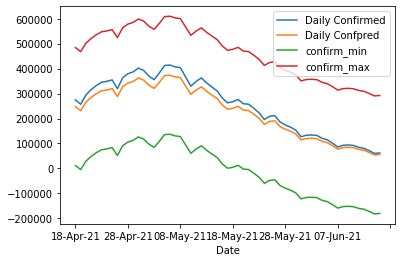

In [32]:
df.plot()

In [33]:
df["Model Accuracy"] = round((1-MAPE),2)
df

,Daily Confirmed,Daily Confpred,confirm_min,confirm_max,Model Accuracy
Date,,,,,
18-Apr-21,275063,247961.640625,11651.484375,484271.81250,0.9
19-Apr-21,257003,231681.140625,-4629.015625,467991.31250,0.9
20-Apr-21,294365,265361.812500,29051.656250,501671.96875,0.9
21-Apr-21,315752,284641.500000,48331.343750,520951.65625,0.9
22-Apr-21,332531,299767.281250,63457.125000,536077.43750,0.9
23-Apr-21,345296,311274.500000,74964.343750,547584.62500,0.9
24-Apr-21,348996,314609.937500,78299.781250,550920.12500,0.9
25-Apr-21,354658,319714.062500,83403.906250,556024.25000,0.9
26-Apr-21,319471,287994.093750,51683.937500,524304.25000,0.9


In [49]:
test_prediction = []

##last n points from training set
first_eval_batch = close_data2[58:]
current_batch = first_eval_batch.reshape(1,1,1)

In [47]:
current_batch.shape

(1, 1, 1)

In [51]:
## how far in future we can predict
for i in range(len(close_data2)+30):
    prediction = model.predict(current_batch)[0]
    close_data2.append(prediction)
    current_batch = np.append(current_batch[:,1:,:],[[prediction]],axis=1)

AttributeError: 'numpy.ndarray' object has no attribute 'append'